# Importing Required Libraries

In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,classification_report,roc_curve

# Data Gathering

In [31]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# EDA

# Data Visualization

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [33]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [34]:
df["Species"] = df["Species"].replace({"Iris-setosa":0,"Iris-virginica":1,"Iris-versicolor":2})

In [35]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
84,85,5.4,3.0,4.5,1.5,2
29,30,4.7,3.2,1.6,0.2,0
19,20,5.1,3.8,1.5,0.3,0
133,134,6.3,2.8,5.1,1.5,1
34,35,4.9,3.1,1.5,0.1,0


In [36]:
# df.drop("Id",inplace=True,axis = 1)

# Feature Selection

In [37]:
x = df.drop(["Species","Id"],axis = 1)
y = df["Species"]

In [38]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [39]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: Species, Length: 150, dtype: int64

# Splitting data into training and testing

In [40]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.2,random_state=25,stratify=y)

# Model Training

In [41]:
log_model = LogisticRegression(multi_class = "ovr")
log_model.fit(x_tr,y_tr)

LogisticRegression(multi_class='ovr')

# Predictions

In [42]:
y_pred = log_model.predict(x_te)

In [43]:
y_pred

array([2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       1, 1, 1, 2, 0, 2, 1, 1], dtype=int64)

In [44]:
np.array(y_te)

array([2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2,
       1, 1, 2, 2, 0, 2, 1, 1], dtype=int64)

# Testing Accuracy

In [45]:
clf_report = classification_report(y_pred,y_te)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.82      0.86        11
           2       0.80      0.89      0.84         9

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [46]:
y_pred_prob = log_model.predict_proba(x_te)

In [47]:
# y_pred_prob

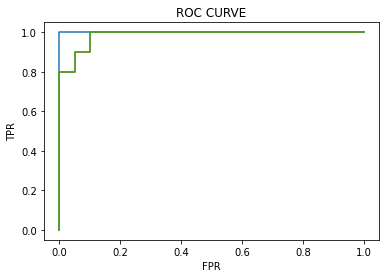

In [48]:
fpr = dict()
tpr = dict()
roc_auc_score1 = dict()
for i in range(3):
    fpr[i], tpr[i], thresh = roc_curve(y_te,y_pred_prob[:,i],pos_label=i)
   
plt.title('ROC CURVE')   
plt.xlabel('FPR')
plt.ylabel('TPR')

for i in range(3): 
    plt.plot(fpr[i],tpr[i])

In [49]:
accuracy_score(y_pred,y_te)

0.9

# Training accuracy

In [50]:
y_pred_tr = log_model.predict(x_tr)
y_pred_tr

array([1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 0, 0, 0,
       1, 2, 1, 1, 1, 2, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 2,
       2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 0, 2, 2, 1, 0, 0,
       2, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 2, 0, 2, 2, 1, 2,
       0, 2, 1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 2, 0, 0], dtype=int64)

In [51]:
np.array(y_tr)

array([1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 2, 2, 0, 0, 0, 0,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 2,
       2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 0, 2, 2, 1, 0, 0,
       2, 2, 0, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2,
       0, 2, 1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 2, 0, 0], dtype=int64)

In [52]:
clf_report = classification_report(y_pred_tr,y_tr)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.93      0.95        42
           2       0.93      0.97      0.95        38

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [53]:
accuracy_score(y_pred_tr,y_tr)

0.9666666666666667

# Creating Pickle File

In [54]:
import pickle
import os
model_folder_path = 'model'
if not os.path.exists(model_folder_path):
    os.mkdir(model_folder_path)
    
pickle.dump(log_model,open(f'{model_folder_path}/model.pkl','wb'))

In [55]:
### pickle.dump(log_model,open('model1.pkl','wb'))

In [56]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [57]:
x_te

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
62,6.0,2.2,4.0,1.0
68,6.2,2.2,4.5,1.5
120,6.9,3.2,5.7,2.3
111,6.4,2.7,5.3,1.9
8,4.4,2.9,1.4,0.2
102,7.1,3.0,5.9,2.1
69,5.6,2.5,3.9,1.1
148,6.2,3.4,5.4,2.3
4,5.0,3.6,1.4,0.2
117,7.7,3.8,6.7,2.2


In [58]:
x_te.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [59]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,1
146,147,6.3,2.5,5.0,1.9,1
147,148,6.5,3.0,5.2,2.0,1
148,149,6.2,3.4,5.4,2.3,1
